<h1>World Happiness</h1><br>
Amidst the negativity in present decade and a lot of research being done on the Covid data, I thought of starting which something with Happiness, World Happiness. After searching on various sites, I got a simple dataset on kaggle that gives country-wise Happiness Score and its composite factors. 

The dataset contains country-wise happiness scores, rankings and extent to which various factors contributing to a country's happiness. The dataset is dataser is taken from kaggle: https://www.kaggle.com/unsdsn/world-happiness There are 6 factors listed:

Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
other factors are put into the 'Dystopia Residual'. The addition of above 7 qualities makes the happiness score of region-wise coutries given. The rank is predicted on the basis of the happiness score. Getting acquainted with the data, I define the scope of the problem:

1. To identify Top 3 factors contributing to happiness rank in a particular year.
2. Change in happiness score in a particular region with respect to time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


In [2]:
#reading the files
df19 = pd.read_csv('Happiness Index/2019.csv')
df18 = pd.read_csv('Happiness Index/2018.csv')
df17 = pd.read_csv('Happiness Index/2017.csv')
df16 = pd.read_csv('Happiness Index/2016.csv')
df15 = pd.read_csv('Happiness Index/2015.csv')

In [3]:
df19['Dystopia Residual'] = df19['Score'] - df19['GDP per capita'] - df19['Social support'] - df19['Healthy life expectancy'] - df19['Freedom to make life choices'] - df19['Generosity'] - df19['Perceptions of corruption']
df19.rename(columns={'Country or region': 'Country'}, inplace = True)

In [134]:
regions = df15[['Country', 'Region']]
df19_regions = pd.merge(regions,df19,on='Country')
region_wise = df19_regions.groupby('Region')[['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual' ]].mean()

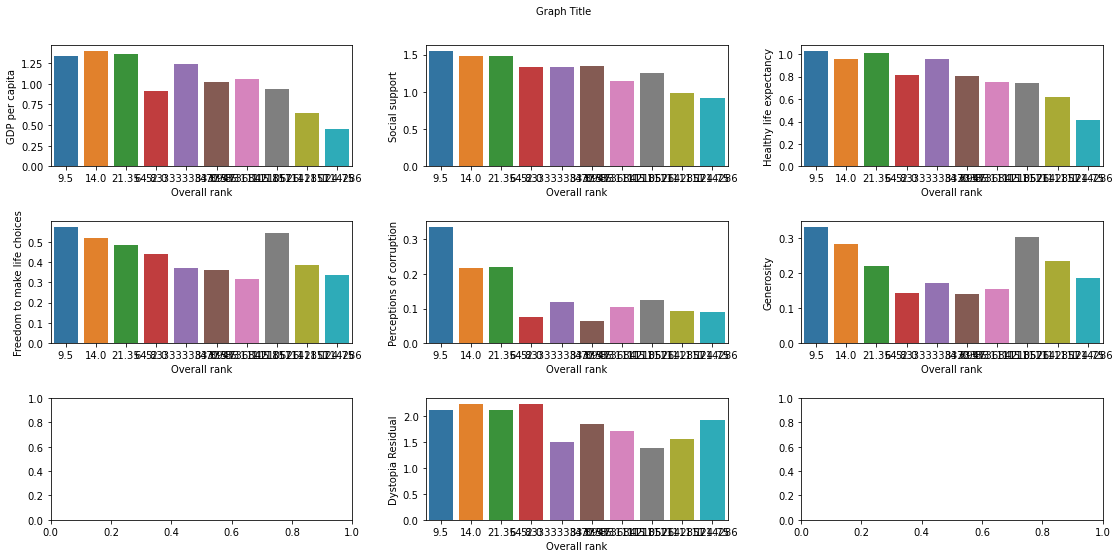

In [139]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
plt.suptitle('Graph Title', fontsize=10)

sns.barplot(x = region_wise['Overall rank'], y = region_wise['GDP per capita'], ax = axes[0,0])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Social support'], ax = axes[0,1])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Healthy life expectancy'], ax = axes[0,2])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Freedom to make life choices'], ax = axes[1,0])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Perceptions of corruption'], ax = axes[1,1])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Generosity'], ax = axes[1,2])
sns.barplot(x = region_wise['Overall rank'], y = region_wise['Dystopia Residual'], ax = axes[2,1])

plt.tight_layout(pad=2)

<h2>Feature Selection:</h2><br>
<b>Step 1:</b> Independent feature should have high correlation with the target variable. Plotting the correaltion matrix.<br>

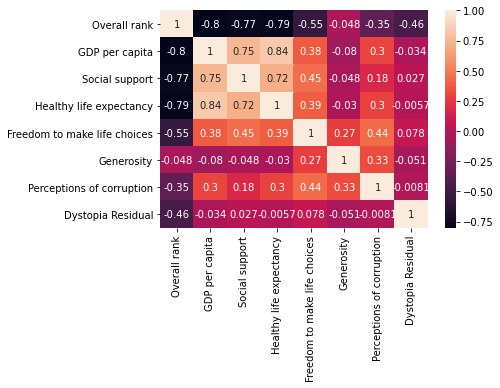

In [4]:
#1.1 Correaltion between the given scoring factors 
df19_2 = df19[['Overall rank','GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual']]
correlation_mat_19 = df19_2.corr()
sns.heatmap(correlation_mat_19, annot = True)
plt.show()

In [5]:
#1.2 removing corelated features
correlated_features = set()
correlation_matrix_19 = df19.drop('Score', axis=1).corr()

for i in range(len(correlation_matrix_19.columns)):
    for j in range(i):
        if abs(correlation_matrix_19.iloc[i, j]) > 0.80:
            colname = correlation_matrix_19.columns[i]
            correlated_features.add(colname)
correlated_features

{'GDP per capita', 'Healthy life expectancy'}

<b>1.</b> Generosity has low correlation with the Score. So, dropping Generosity.<br>
<b>2.</b> GDP per capita has higher corelatiom with Health Life expectancy. So, moving ahead with one of the two will make more sense. So, dropping Health Life Expectancy. <br>

In [6]:
df19.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')

In [7]:
X_19 = df19[['GDP per capita', 'Social support', 'Freedom to make life choices',
       'Perceptions of corruption', 'Dystopia Residual']]
y_19 = df19['Overall rank']

<b> Step 2:</b> Removing features having very less variance 

In [8]:
#Removing Constant Features using Variance Threshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_19)
len(X_19.columns[constant_filter.get_support()])
constant_columns = [column for column in X_19.columns
                    if column not in X_19.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


Using the mutual information between two variables. It measures how much a given feature can explain another (target), or more technically, how much information about the target will variable will be obtained by having observed a feature.

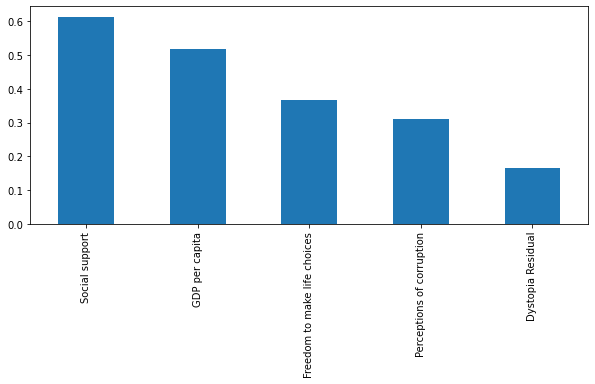

In [10]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_regression(X_19,y_19)
mi = pd.Series(mi)
mi.index = X_19.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4));

Clearly, 
Social Support, GDP per capita and Freedom to make life choices are the major factors contributing to Happiness Rank in year 2019. Similar analysis can be done with other years as well. 

In [48]:
df18.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [64]:
df16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [65]:

df18 = df18.rename(columns={'Country or region': 'Country'})
df18_regions = pd.merge(regions,df18,on='Country')
df17_regions = pd.merge(regions,df17,on='Country')

In [123]:
region_wise_19 = df19_regions.groupby('Region')[['Score']].mean().reset_index()
region_wise_18 = df18_regions.groupby('Region')[['Score']].mean().reset_index()
region_wise_17 = df17_regions.groupby('Region')[['Happiness.Score']].mean().reset_index()
region_wise_16 = df16.groupby('Region')[['Happiness Score']].mean().reset_index()
region_wise_15 = df15.groupby('Region')[['Happiness Score']].mean().reset_index()

rw_score = region_wise_19[['Region', 'Score']]
rw_score = rw_score.rename(columns={'Score': 'Score_19'})
rw_score['Score_18'] = pd.Series(region_wise_18['Score'])
rw_score['Score_17'] = pd.Series(region_wise_17['Happiness.Score'])
rw_score['Score_16'] = pd.Series(region_wise_16['Happiness Score'])
rw_score['Score_15'] = pd.Series(region_wise_15['Happiness Score'])
#rw_score.sort_values(by=['Score_19'], inplace=True, ascending = False)
rw_score

,Region,Score_19,Score_18,Score_17,Score_16,Score_15
0,Australia and New Zealand,7.267500,7.298000,7.299000,7.323500,7.285000
1,Central and Eastern Europe,5.571786,5.463966,5.409931,5.370690,5.332931
2,Eastern Asia,5.688833,5.672000,5.496500,5.624167,5.626167
3,Latin America and Caribbean,5.942550,5.937750,5.957905,6.101750,6.144682
4,Middle East and Northern Africa,5.237000,5.282737,5.369684,5.386053,5.406900
5,North America,7.085000,7.107000,7.154500,7.254000,7.273000
6,Southeastern Asia,5.273667,5.313444,5.444875,5.338889,5.317444
7,Southern Asia,4.526857,4.603857,4.628429,4.563286,4.580857
8,Sub-Saharan Africa,4.314611,4.192472,4.084722,4.136421,4.202800
9,Western Europe,6.898400,6.829100,6.703714,6.685667,6.689619


In [ ]:
#region wise performance over the years.

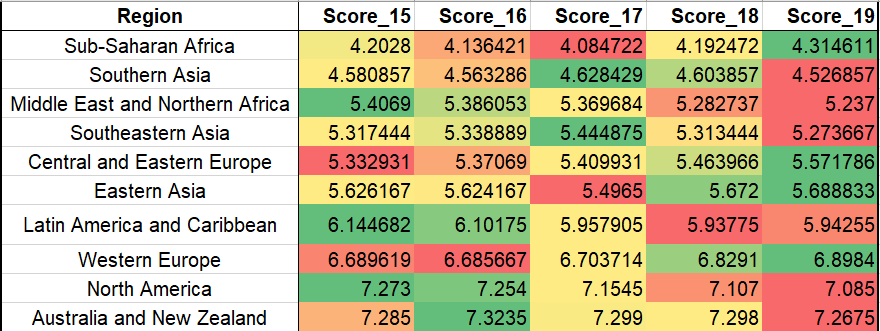

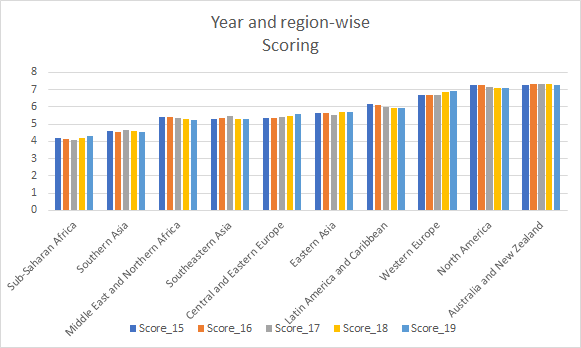

Clealry, ranking is almost same over the regions, but Sub-Saharan Africa and Western Europe are performing better lately whereas regions of LatAm and North America has shown depletion in the scores.